In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

## Task 1: Preprocessing

>#### load 'weather_forecast_data.csv' dataset

In [2]:
df = pd.read_csv('weather_forecast_data.csv')

In [3]:
# get copy from the original to preprocess

df_pre = df.copy()

>#### check missing values

In [4]:
# to know the number of the rows
print(f"total records:",len(df), "\n")


# to get the number of missing values in each column
print("missing records in each column:","\n")
print(df_pre.isnull().sum())

print("-"*80)

print("Records with null values: ","\n")
print(df_pre[df_pre.isnull().any(axis=1)])

# according to the output there are missing values



total records: 2500 

missing records in each column: 

Temperature    25
Humidity       40
Wind_Speed     32
Cloud_Cover    33
Pressure       27
Rain            0
dtype: int64
--------------------------------------------------------------------------------
Records with null values:  

      Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
8             NaN  89.077804    4.842197    83.941093  1029.932706  no rain
25      26.420959  72.283460         NaN     0.812305  1018.818494  no rain
59      11.069078  89.683583    5.804538          NaN   992.303157  no rain
68            NaN  58.981077    6.261278    37.580222  1019.684713  no rain
74      33.078976  81.000650    5.744880    86.933978          NaN  no rain
...           ...        ...         ...          ...          ...      ...
2429          NaN  93.920582   13.302477    90.346087   998.183246     rain
2436    16.838551  86.248171   13.326615          NaN  1004.497445     rain
2445    14.279301        NaN 

>#### Handle missing values with dropping them

In [5]:

df_dropped_nulls= df_pre.dropna()
print(f"total records without nulls:",len(df_dropped_nulls), "\n")

df_dropped_nulls.head()

total records without nulls: 2347 



,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,19.096119,71.651723,14.782324,48.699257,987.954760,no rain
1,27.112464,84.183705,13.289986,10.375646,1035.430870,no rain
2,20.433329,42.290424,7.216295,6.673307,1033.628086,no rain
3,19.576659,40.679280,4.568833,55.026758,1038.832300,no rain
4,19.828060,93.353211,0.104489,30.687566,1009.423717,no rain


>#### Handle missing values with replacing them with Avg

In [6]:

# get the numerical features only because we can't get mean for categorical feature

df_numerical_features_only=df_pre.select_dtypes(include="number")


# replace the null values with the average of the numerical features

df_numerical_filled_avg = df_numerical_features_only.fillna(df_numerical_features_only.mean())


# concatenate the numerical features with the target column "Rain" and create a new dataframe "df_filledAvg"

df_filled_avg=pd.concat([df_numerical_filled_avg,df_pre["Rain"]], axis=1)


print("DataFrame after replacing null values with the average:")
print(df_filled_avg)

DataFrame after replacing null values with the average:
      Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0       19.096119  71.651723   14.782324    48.699257   987.954760  no rain
1       27.112464  84.183705   13.289986    10.375646  1035.430870  no rain
2       20.433329  42.290424    7.216295     6.673307  1033.628086  no rain
3       19.576659  40.679280    4.568833    55.026758  1038.832300  no rain
4       19.828060  93.353211    0.104489    30.687566  1009.423717  no rain
...           ...        ...         ...          ...          ...      ...
2495    14.684023  82.054139    8.751728    58.939058  1003.418337     rain
2496    20.754521  92.099534   17.305508    70.889921  1049.801435     rain
2497    22.087516  71.530065    0.857918    84.162554  1039.664865     rain
2498    18.542453  97.451961    5.429309    54.643893  1014.769130     rain
2499    23.720338  89.592641    7.335604    50.501694  1032.378759     rain

[2500 rows x 6 columns]


>#### determine targets & features

In [7]:
targets_columns=["Rain"]

df_targets_filled_avg = df_filled_avg[targets_columns]
df_features_filled_avg = df_filled_avg.drop(columns=targets_columns)

df_targets_dropped_nulls = df_dropped_nulls[targets_columns]
df_features_dropped_nulls = df_dropped_nulls.drop(columns=targets_columns)

print("Avg data:")
display(df_features_filled_avg.head())
display(df_targets_filled_avg.head())

print("Dropped nulls data:")
display(df_features_dropped_nulls.head())
display(df_targets_dropped_nulls.head())


Avg data:


,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
0,19.096119,71.651723,14.782324,48.699257,987.954760
1,27.112464,84.183705,13.289986,10.375646,1035.430870
2,20.433329,42.290424,7.216295,6.673307,1033.628086
3,19.576659,40.679280,4.568833,55.026758,1038.832300
4,19.828060,93.353211,0.104489,30.687566,1009.423717


,Rain
0,no rain
1,no rain
2,no rain
3,no rain
4,no rain


Dropped nulls data:


,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
0,19.096119,71.651723,14.782324,48.699257,987.954760
1,27.112464,84.183705,13.289986,10.375646,1035.430870
2,20.433329,42.290424,7.216295,6.673307,1033.628086
3,19.576659,40.679280,4.568833,55.026758,1038.832300
4,19.828060,93.353211,0.104489,30.687566,1009.423717


,Rain
0,no rain
1,no rain
2,no rain
3,no rain
4,no rain


>#### splitting data into train , test

In [8]:

# make the 80% from the data training set and 20% from the data testing set
# random state to ensure that the split return the same data each run

df_features_train_avg, df_features_test_avg, df_targets_train_avg, df_targets_test_avg = train_test_split(df_features_filled_avg, df_targets_filled_avg, test_size=0.2, random_state=42) 
df_features_train_dropped, df_features_test_dropped, df_targets_train_dropped, df_targets_test_dropped = train_test_split(df_features_dropped_nulls, df_targets_dropped_nulls, test_size=0.2, random_state=42) 

print(len(df_features_train_avg))
print(len(df_features_test_avg))
print(len(df_targets_train_avg))
print(len(df_targets_test_avg))

print(len(df_features_train_dropped))
print(len(df_features_test_dropped))
print(len(df_targets_train_dropped))
print(len(df_targets_test_dropped))


2000
500
2000
500
1877
470
1877
470


In [9]:
# final targets will be worked on 

label_encoder = LabelEncoder()
df_targets_train_avg = label_encoder.fit_transform(df_targets_train_avg)
df_targets_test_avg = label_encoder.transform(df_targets_test_avg)

df_targets_train_dropped = label_encoder.fit_transform(df_targets_train_dropped)
df_targets_test_dropped = label_encoder.transform(df_targets_test_dropped)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array wa

>#### check scaling of data

In [10]:

print("filled avg data:")
display(df_filled_avg.describe().T)

print("dropped nulls data:")
display(df_dropped_nulls.describe().T)

# according to the output from min, max the numeric features dosn't have the same scale

filled avg data:


,count,mean,std,min,25%,50%,75%,max
Temperature,2500.0,22.573777,7.295628,10.001842,16.417898,22.573777,28.934369,34.995214
Humidity,2500.0,64.366909,19.813325,30.005071,47.493987,64.366909,81.445049,99.997481
Wind_Speed,2500.0,9.911826,5.743575,0.009819,4.829795,9.911826,14.889660,19.999132
Cloud_Cover,2500.0,49.808770,28.869772,0.015038,24.817296,49.808770,74.989410,99.997795
Pressure,2500.0,1014.409327,20.072933,980.014486,997.190281,1014.095390,1031.606187,1049.985593


dropped nulls data:


,count,mean,std,min,25%,50%,75%,max
Temperature,2347.0,22.586674,7.325814,10.001842,16.423651,22.533110,28.967040,34.995214
Humidity,2347.0,64.313486,19.969574,30.005071,47.124078,64.044753,81.607683,99.997481
Wind_Speed,2347.0,9.936976,5.778717,0.009819,4.786505,9.999957,14.955263,19.999132
Cloud_Cover,2347.0,49.826460,29.163519,0.015038,24.119752,49.735062,75.496921,99.997795
Pressure,2347.0,1014.362428,20.157864,980.014486,997.010203,1013.591009,1031.683526,1049.985593


>#### features are scaled

In [11]:
scaler = RobustScaler()

# the scaler return ndarray

df_features_train_avg = scaler.fit_transform(df_features_train_avg)
df_features_test_avg = scaler.fit_transform(df_features_test_avg)


df_features_train_dropped = scaler.fit_transform(df_features_train_dropped)
df_features_test_dropped = scaler.fit_transform(df_features_test_dropped)


# convert the ndarray to DataFrame

# final features will be worked on

df_features_train_avg = pd.DataFrame(df_features_train_avg, columns=df_features_filled_avg.columns)
df_features_test_avg = pd.DataFrame(df_features_test_avg, columns=df_features_filled_avg.columns)


df_features_train_dropped = pd.DataFrame(df_features_train_dropped, columns=df_features_dropped_nulls.columns)
df_features_test_dropped = pd.DataFrame(df_features_test_dropped, columns=df_features_dropped_nulls.columns)


print("Avg Features:")
display(df_features_train_avg.describe().T)
display(df_features_test_avg.describe().T)

print("Dropped Nulls Features:")
display(df_features_train_dropped.describe().T)
display(df_features_test_dropped.describe().T)

Avg Features:


,count,mean,std,min,25%,50%,75%,max
Temperature,2000.0,0.006984,0.585913,-1.007019,-0.480487,0.000000e+00,0.519513,0.994964
Humidity,2000.0,0.001713,0.583693,-1.016413,-0.498781,0.000000e+00,0.501219,1.053942
Wind_Speed,2000.0,0.002324,0.572086,-0.992389,-0.506319,8.814564e-17,0.493681,0.992458
Cloud_Cover,2000.0,-0.002409,0.579158,-1.002352,-0.500643,0.000000e+00,0.499357,1.009766
Pressure,2000.0,0.004320,0.576514,-0.983183,-0.495991,1.629339e-15,0.504009,1.022535


,count,mean,std,min,25%,50%,75%,max
Temperature,500.0,0.048741,0.585102,-0.939351,-0.460734,-1.439820e-16,0.539266,1.082322
Humidity,500.0,0.030264,0.576656,-0.942682,-0.459049,1.014813e-16,0.540951,1.045610
Wind_Speed,500.0,0.018648,0.574834,-0.940526,-0.469767,9.028694e-17,0.530233,1.088083
Cloud_Cover,500.0,0.002007,0.560934,-0.951363,-0.510561,6.852158e-17,0.489439,0.954122
Pressure,500.0,0.030484,0.609338,-1.012243,-0.457310,-1.737542e-15,0.542690,1.122439


Dropped Nulls Features:


,count,mean,std,min,25%,50%,75%,max
Temperature,1877.0,0.013314,0.586965,-0.980089,-0.483076,0.0,0.516924,1.017992
Humidity,1877.0,0.029810,0.583383,-0.975293,-0.463534,0.0,0.536466,1.081579
Wind_Speed,1877.0,0.002157,0.562383,-0.948840,-0.500565,0.0,0.499435,0.982363
Cloud_Cover,1877.0,0.000646,0.573041,-0.986782,-0.495164,0.0,0.504836,0.989191
Pressure,1877.0,0.009840,0.586561,-1.002763,-0.494292,0.0,0.505708,1.051275


,count,mean,std,min,25%,50%,75%,max
Temperature,470.0,0.001826,0.577461,-1.051809,-0.472722,-1.418679e-16,0.527278,0.938303
Humidity,470.0,-0.047785,0.561405,-0.988673,-0.562850,0.000000e+00,0.437150,0.914910
Wind_Speed,470.0,-0.004965,0.597921,-1.098029,-0.521424,9.421717e-17,0.478576,1.020647
Cloud_Cover,470.0,0.010658,0.543817,-0.883727,-0.508749,6.505213e-17,0.491251,0.929825
Pressure,470.0,0.055036,0.557949,-0.839099,-0.440777,0.000000e+00,0.559223,1.017732


>#### Implement Decision Tree

In [25]:
dt_model_avg = DecisionTreeClassifier(random_state=42)

dt_model_avg.fit(df_features_train_avg, df_targets_train_avg)  #usign averge filled

dt_preds_avg = dt_model_avg.predict(df_features_test_avg)

dt_accuracy_avg = accuracy_score(df_targets_test_avg, dt_preds_avg)
dt_precision_avg = precision_score(df_targets_test_avg, dt_preds_avg)
dt_recall_avg = recall_score(df_targets_test_avg, dt_preds_avg)

print(f"Decision Tree [Accuracy]: {dt_accuracy_avg* 100:.2f}%")
print(f"Decision Tree [Precision]: {dt_precision_avg* 100:.2f}%")
print(f"Decision Tree [Recall]: {dt_recall_avg* 100:.2f}%")


Decision Tree [Accuracy]: 98.60%
Decision Tree [Precision]: 96.23%
Decision Tree [Recall]: 91.07%


>#### The effect of different data handling (Decision Tree)

In [28]:
#Dropped

dt_model_dropped = DecisionTreeClassifier(random_state=42)

dt_model_dropped.fit(df_features_train_dropped, df_targets_train_dropped)

dt_preds_dropped = dt_model_dropped.predict(df_features_test_dropped)

dt_accuracy_dropped = accuracy_score(df_targets_test_dropped, dt_preds_dropped)
dt_precision_dropped = precision_score(df_targets_test_dropped, dt_preds_dropped)
dt_recall_dropped = recall_score(df_targets_test_dropped, dt_preds_dropped)

print(f"Decision Tree (Dropped) [Accuracy]: {dt_accuracy_dropped* 100:.2f}%")
print(f"Decision Tree (Dropped) [Precision]: {dt_precision_dropped* 100:.2f}%")
print(f"Decision Tree (Dropped) [Recall]: {dt_recall_dropped* 100:.2f}%")

#Average filled

print(f"Decision Tree (Avg Filled) [Accuracy]: {dt_accuracy_avg* 100:.2f}%")
print(f"Decision Tree (Avg Filled) [Precision]: {dt_precision_avg* 100:.2f}%")
print(f"Decision Tree (Avg Filled) [Recall]: {dt_recall_avg* 100:.2f}%")

Decision Tree (Dropped) [Accuracy]: 97.23%
Decision Tree (Dropped) [Precision]: 91.04%
Decision Tree (Dropped) [Recall]: 89.71%
Decision Tree (Avg Filled) [Accuracy]: 98.60%
Decision Tree (Avg Filled) [Precision]: 96.23%
Decision Tree (Avg Filled) [Recall]: 91.07%


> #### Decision Tree Explanation Report

>##### plot of the decision tree

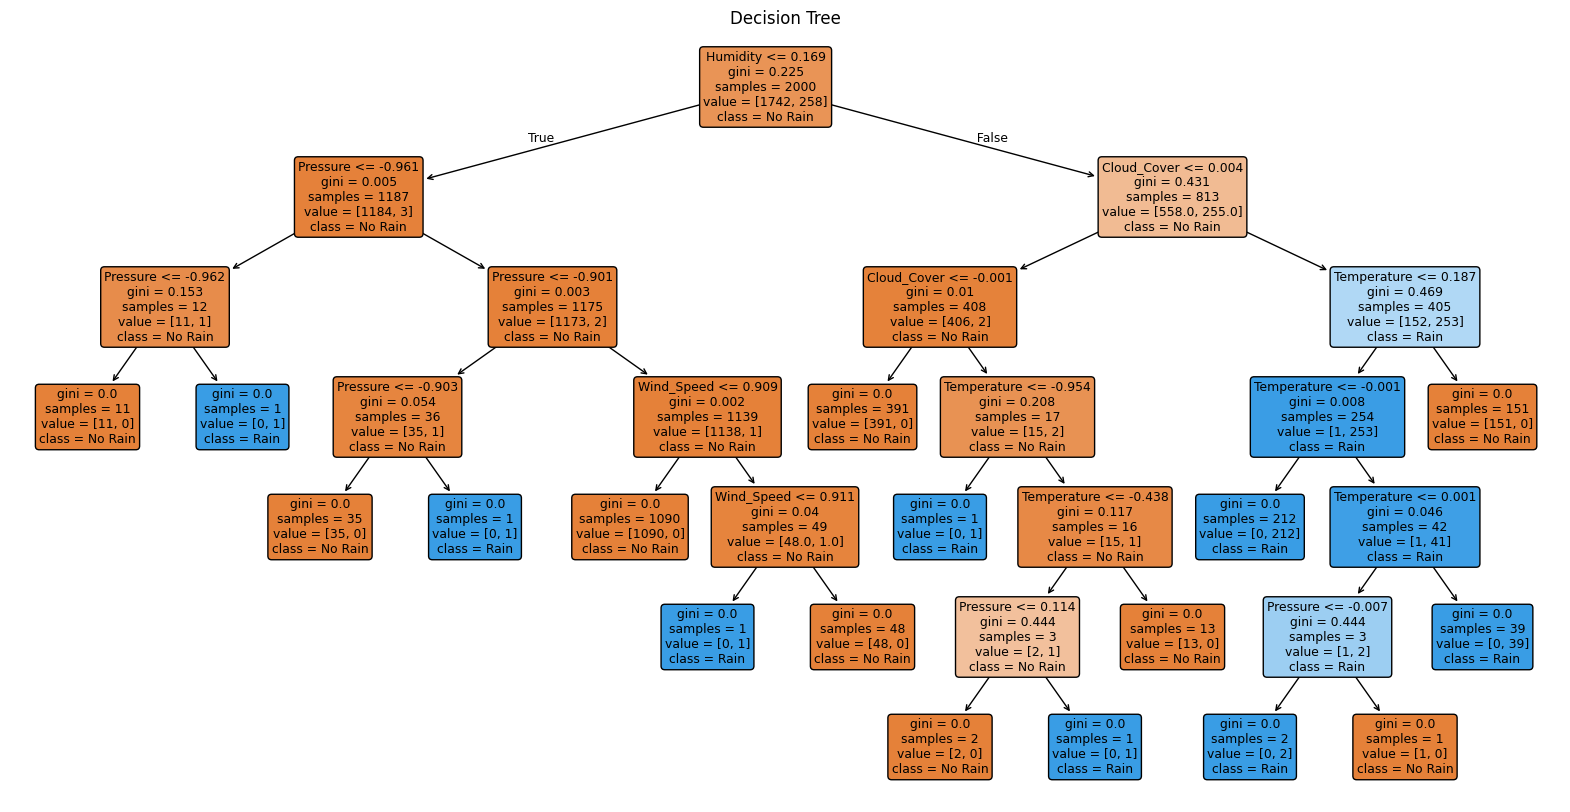

In [ ]:
#for Avgerage-Filled
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model_avg, 
    feature_names=df_features_filled_avg.columns, 
    class_names=["No Rain", "Rain"], 
    filled=True, 
    rounded=True
)
plt.title("Decision Tree")
plt.show()
    
